In [12]:
## Importing Relevant Packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
## Preparing to import data from shared drive file
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
## Import the datafile and check descriptive statistics
data = pd.read_csv('/content/drive/My Drive/IST 718 Big Data/road_casualty.csv')
dataOriginal = data

data.describe()

,accident_year,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,61352.0,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000
mean,2022.0,1.450368,1.333779,1.482299,1.368790,36.670312,6.288157,2.783039,0.800316,0.645325,0.222047,0.048507,0.032860,9.475160,1.091032,4.337674
std,0.0,1.109855,0.981507,0.735614,0.534536,19.574357,2.463082,0.442318,2.197167,2.009611,0.615127,0.426419,0.261327,16.662727,0.903365,3.158496
min,2022.0,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2022.0,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2022.0,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,2022.0,2.000000,1.000000,2.000000,2.000000,50.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,2022.0,227.000000,148.000000,3.000000,9.000000,101.000000,11.000000,3.000000,10.000000,9.000000,9.000000,9.000000,2.000000,98.000000,3.000000,10.000000


In [15]:
## Print shape of data and the first few rows
print(data.shape)
print(data.head())

(61352, 20)
        status accident_index  accident_year accident_reference  \
0  Unvalidated  2022070151244           2022          070151244   
1  Unvalidated  2022070152668           2022          070152668   
2  Unvalidated  2022070154696           2022          070154696   
3  Unvalidated  2022070154696           2022          070154696   
4  Unvalidated  2022070154696           2022          070154696   

   vehicle_reference  casualty_reference  casualty_class  sex_of_casualty  \
0                  2                   1               1                2   
1                  1                   1               1                1   
2                  1                   1               1                2   
3                  2                   3               1                2   
4                  3                   2               1                1   

   age_of_casualty  age_band_of_casualty  casualty_severity  \
0               46                     8                  3

In [16]:
## Some example questions could be:

## What are the most dangerous intersections/locations for 1. Pedestrians, 2 automobile passengers/drivers

## What type of accident has the highest lethality rate.

## What saftey recommendations can be made based off the trends from the data

In [17]:
## Mean of all age of casualties.
data['age_of_casualty'].mean()

36.67031229625766

In [18]:
likely_deaths = data[data['casualty_class'] == 3]
likely_deaths['age_of_casualty'].mean()
## Shows younger people more likely to die in accidents.

34.067337807606265

In [19]:
data['pedestrian_road_maintenance_worker'].sum()/data.shape[0]
## Ratio of number of accidents involving pedestrian road maintenance workers

0.03285956448037554

In [20]:
a, b = np.unique(data['lsoa_of_casualty'], return_counts = True)
print(max(b[1:]), a[np.argmax(b[1:])])
## Number of accidents in 2022 in a specific area (maximum)

22 E01019455


In [21]:
## Visualize all column names and their indexes
def printColIndexName(data_frame):
    data_columns = data_frame.columns
    for index, column_name in enumerate(data_columns):
        print(f"Column Index: {index}, Column Name: {column_name}")

printColIndexName(data)

print(data.dtypes)
## Drop data values with unknown LSOA
data.drop(data[data['lsoa_of_casualty'] == '-1'].index, inplace=True)
print(data['lsoa_of_casualty'].head(n=20))


Column Index: 0, Column Name: status
Column Index: 1, Column Name: accident_index
Column Index: 2, Column Name: accident_year
Column Index: 3, Column Name: accident_reference
Column Index: 4, Column Name: vehicle_reference
Column Index: 5, Column Name: casualty_reference
Column Index: 6, Column Name: casualty_class
Column Index: 7, Column Name: sex_of_casualty
Column Index: 8, Column Name: age_of_casualty
Column Index: 9, Column Name: age_band_of_casualty
Column Index: 10, Column Name: casualty_severity
Column Index: 11, Column Name: pedestrian_location
Column Index: 12, Column Name: pedestrian_movement
Column Index: 13, Column Name: car_passenger
Column Index: 14, Column Name: bus_or_coach_passenger
Column Index: 15, Column Name: pedestrian_road_maintenance_worker
Column Index: 16, Column Name: casualty_type
Column Index: 17, Column Name: casualty_home_area_type
Column Index: 18, Column Name: casualty_imd_decile
Column Index: 19, Column Name: lsoa_of_casualty
status                   

#Reading in and merging second data source

In [22]:
## Read in the second dataset

data2 = pd.read_csv('/content/drive/MyDrive/IST 718 Big Data/ist718_datasource2.csv')
dataOriginal2 = data2

data2.info()

## subset the columns we want from the second dataset
column_indexes = [1, 7]
subset_data2 = data2.iloc[:, column_indexes]

## Renaming the columns
subset_data2.rename(columns={"LSOA21CD": "LSOA", "LTLA22NM": "Region"}, inplace=True)
print(subset_data2.columns)
data2 = subset_data2
print('------')
print(data2.head())

## Rename the original dataset to prepare for merge
data.rename(columns={"lsoa_of_casualty": "LSOA"}, inplace=True)

## Merge both datasets
merged_data = pd.merge(data, data2, on='LSOA', how='outer')

## Check for any issues and drop any missing values
print(merged_data.head())
print(len(merged_data))
merged_data.dropna (inplace=True)
print(merged_data['Region'].unique())
print(len(merged_data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35672 entries, 0 to 35671
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ObjectId   35672 non-null  int64 
 1   LSOA21CD   35672 non-null  object
 2   LSOA21NM   35672 non-null  object
 3   WD22CD     35672 non-null  object
 4   WD22NM     35672 non-null  object
 5   WD22NMW    1917 non-null   object
 6   LTLA22CD   35672 non-null  object
 7   LTLA22NM   35672 non-null  object
 8   LTLA22NMW  1917 non-null   object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB
Index(['LSOA', 'Region'], dtype='object')
------
        LSOA                Region
0  E01000001        City of London
1  E01000002        City of London
2  E01000003        City of London
3  E01000005        City of London
4  E01000006  Barking and Dagenham
        status accident_index  accident_year accident_reference  \
0  Unvalidated  2022070151244         2022.0          070151244   
1  Unvalidated  2022

<ipython-input-22-ca82d3bc241e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data2.rename(columns={"LSOA21CD": "LSOA", "LTLA22NM": "Region"}, inplace=True)


['Cheshire East' 'Cheshire West and Chester' 'Trafford' 'Pembrokeshire'
 'Halton' 'Warrington' 'Bradford' 'Buckinghamshire' 'Rotherham'
 'Sheffield' 'Barnsley' 'Doncaster' 'North East Lincolnshire'
 'East Riding of Yorkshire' 'Kingston upon Hull, City of'
 'North Lincolnshire' 'Calderdale' 'York' 'Ryedale' 'Scarborough' 'Selby'
 'Craven' 'Harrogate' 'Hambleton' 'Stockton-on-Tees' 'Leeds'
 'Richmondshire' 'High Peak' 'Middlesbrough' 'North East Derbyshire'
 'East Staffordshire' 'Kirklees' 'Birmingham' 'Solihull' 'Sandwell'
 'Wakefield' 'Wolverhampton' 'Coventry' 'Stoke-on-Trent' 'Walsall'
 'Dudley' 'Gloucester' 'North Warwickshire' 'Somerset West and Taunton'
 'Liverpool' 'Sefton' 'Knowsley' 'Wirral' 'West Lancashire' 'St. Helens'
 'Bolton' 'West Lindsey' 'Hartlepool' 'Croydon' 'Bexley' 'Gravesham'
 'Broadland' 'Enfield' 'Havering' 'Islington' 'Haringey' 'Wandsworth'
 'Lambeth' 'Barking and Dagenham' 'Brent' 'Tower Hamlets' 'Redbridge'
 'Newham' 'Hillingdon' 'Hertsmere' 'Camden' 'Bromle

In [23]:
print('Looking at age')

## Dropping values with unknown value from age
merged_data['age_of_casualty'] = merged_data['age_of_casualty'].astype(int)
mreged_data = merged_data.drop(merged_data[merged_data.age_of_casualty == -1].index, inplace=True)

print(merged_data['age_of_casualty'].head())
print(sorted(merged_data['age_of_casualty'].unique()))

print('Looking at sex')

## Dropping values with unknown value from sex
merged_data['sex_of_casualty'] = merged_data['sex_of_casualty'].astype(int)
merged_data.drop(merged_data[(merged_data.sex_of_casualty == -1) | (merged_data.sex_of_casualty == 9)].index, inplace=True)

print(merged_data['sex_of_casualty'].head())
print(sorted(merged_data['sex_of_casualty'].unique()))

merged_data['casualty_reference'].describe()
merged_data['car_passenger'].describe()

## Dropping unknown label from car passenger
merged_data['car_passenger'] = merged_data['car_passenger'].astype(int)
merged_data.drop(merged_data[(merged_data.car_passenger == -1) | (merged_data.car_passenger == 9)].index, inplace=True)

## Droppping potentially incorrect labels from casualty_reference
merged_data['casualty_reference'] = merged_data['casualty_reference'].astype(int)
merged_data.drop(merged_data[(merged_data.casualty_reference == 22) | (merged_data.casualty_reference == 148)].index, inplace=True)

Looking at age
0    46
1    78
2    30
3    38
4     6
Name: age_of_casualty, dtype: int64
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101]
Looking at sex
0    2
1    1
2    1
3    1
4    1
Name: sex_of_casualty, dtype: int64
[1, 2]


In [24]:
## Look at our new merged dataset
print(merged_data.dtypes)
merged_data.describe()

data_columns = merged_data.columns
for index, column_name in enumerate(data_columns):
    print(f"Column Index: {index}, Column Names: {column_name}")

## Drop values that we think will not be useful within the model
indexes_to_drop = [0,1,2,3,9,14]
# Include index 13 to drop car_passenger

merged_data.drop(merged_data.columns[indexes_to_drop], axis=1, inplace=True)

## Our final model
print(merged_data.columns)

status                                 object
accident_index                         object
accident_year                         float64
accident_reference                     object
vehicle_reference                     float64
casualty_reference                      int64
casualty_class                        float64
sex_of_casualty                         int64
age_of_casualty                         int64
age_band_of_casualty                  float64
casualty_severity                     float64
pedestrian_location                   float64
pedestrian_movement                   float64
car_passenger                           int64
bus_or_coach_passenger                float64
pedestrian_road_maintenance_worker    float64
casualty_type                         float64
casualty_home_area_type               float64
casualty_imd_decile                   float64
LSOA                                   object
Region                                 object
dtype: object
Column Index: 0, Col

In [25]:
## Importing packages relevant to creating our model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
import pydot
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler

In [26]:
## Finding out more information about our casualty class
np.unique(merged_data['casualty_severity'], return_counts = True)

# Severity 1 = fatal
# Severity 2 = serious
# Severity 3 = slight

## Appears imbalanced, if it turns out to be an issue within the model, then we can appropiately adjust

(array([1., 2., 3.]), array([  566,  9382, 39428]))

In [27]:
print(merged_data.dtypes)
print(merged_data.head())
merged_data.iloc[:, 0:13] = merged_data.iloc[:, 0:13].astype(int)
print(merged_data.dtypes)

vehicle_reference                     float64
casualty_reference                      int64
casualty_class                        float64
sex_of_casualty                         int64
age_of_casualty                         int64
casualty_severity                     float64
pedestrian_location                   float64
pedestrian_movement                   float64
car_passenger                           int64
pedestrian_road_maintenance_worker    float64
casualty_type                         float64
casualty_home_area_type               float64
casualty_imd_decile                   float64
LSOA                                   object
Region                                 object
dtype: object
   vehicle_reference  casualty_reference  casualty_class  sex_of_casualty  \
0                2.0                   1             1.0                2   
1                2.0                   1             2.0                1   
2                1.0                   1             1.0         

<ipython-input-27-d5a7428b1b60>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged_data.iloc[:, 0:13] = merged_data.iloc[:, 0:13].astype(int)


In [28]:
maintworker = merged_data[merged_data['pedestrian_road_maintenance_worker'] >= 1]
print(maintworker.head(), '\nThere are', len(maintworker),'occurences, out of' ,len(merged_data), 'of vehicle accidents that involved maintenance workers')


     vehicle_reference  casualty_reference  casualty_class  sex_of_casualty  \
127                  2                   1               3                1   
214                  1                   1               3                1   
219                  1                   1               3                1   
280                  1                   1               3                1   
350                  1                   1               3                1   

     age_of_casualty  casualty_severity  pedestrian_location  \
127               51                  2                    9   
214               10                  2                    1   
219               31                  3                    6   
280               13                  2                    9   
350               17                  2                    6   

     pedestrian_movement  car_passenger  pedestrian_road_maintenance_worker  \
127                    5              0                      

In [29]:
## Separating the label and the other data
y_all = merged_data['casualty_severity']
x_all = merged_data.drop('casualty_severity', axis = 1)

print(x_all.head())

printColIndexName(merged_data)

   vehicle_reference  casualty_reference  casualty_class  sex_of_casualty  \
0                  2                   1               1                2   
1                  2                   1               2                1   
2                  1                   1               1                1   
3                  1                   2               1                1   
4                  1                   1               2                1   

   age_of_casualty  pedestrian_location  pedestrian_movement  car_passenger  \
0               46                    0                    0              0   
1               78                    0                    0              1   
2               30                    0                    0              0   
3               38                    0                    0              0   
4                6                    0                    0              1   

   pedestrian_road_maintenance_worker  casualty_type  casualty

In [30]:
## Label encoding the LSOA column by dropping the E at the front
x_all['LSOA'] = x_all['LSOA'].str.slice_replace(0,1,'')

In [31]:
## Creating a second label encoder for the region
le = preprocessing.LabelEncoder()
le.fit(x_all['Region'])
le.classes_[:6]

array(['Adur', 'Allerdale', 'Amber Valley', 'Arun', 'Ashfield', 'Ashford'],
      dtype=object)

In [32]:
## Changing the column values to the label encoded values for model building
x_all['Region'] = le.transform(x_all['Region'])

In [33]:
## Creating the relevant training and testing data
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size = 0.2, random_state = 123)

In [34]:
## Create the Random Forest
rfc = RandomForestClassifier(random_state = 123)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [35]:
## Predict the model

y_pred_rfc = rfc.predict(X_test)
metrics.accuracy_score(y_test, y_pred_rfc)

0.7831105710814095

In [36]:
## Check the confusion amtrix
confusion_matrix(y_test, y_pred_rfc)

array([[   0,   16,   98],
       [   1,  215, 1679],
       [   2,  346, 7519]])

In [37]:
## Export and import readings for these two blocksk may need to be altered for the colab ipynb

## Take a single tree instance
estimator = rfc.estimators_[5]

## Export the file as dot
export_graphviz(estimator, out_file='tree.dot',
                feature_names = x_all.columns,
                class_names = ['Casualty Severity 1','Casualty Severity 2', 'Casualty Severity 3'],
                rounded = True, proportion = False,
                precision = 2, filled = True)



In [38]:
## Reimport file through different package
(graph,) = pydot.graph_from_dot_file('tree.dot')
## Convert dot file to png
graph.write_png('tree.png')
## Display the png
from IPython.display import Image
Image(filename='tree.png')

print('')
## It's a bit too complicated to show properly in notebook, this file will be uploaded separately as well
# Due to the large nature, it is not exactly readable but it gives a good idea of the complexity of the tree.

In [39]:
## Check training and validaton scores for potential overfitting
train_scores, valid_scores = validation_curve(Ridge(), X_train, y_train, param_name = 'alpha', param_range = np.logspace(-7,3,3), cv=5)

In [40]:
## Visualize percentage differences
(valid_scores - train_scores)*100

array([[ 0.12519369,  0.06579127, -3.77907609,  0.10722516, -1.01468781],
       [ 0.12519382,  0.06579206, -3.7790735 ,  0.10722468, -1.01468788],
       [ 0.1376732 ,  0.12010049, -3.44696672,  0.07352704, -1.02248387]])

In [41]:
## Observer the most influential features of the dataset
rfc.feature_importances_


array([0.01939114, 0.02233831, 0.0079856 , 0.01560117, 0.22168498,
       0.01791851, 0.01444265, 0.00723087, 0.00466474, 0.07051401,
       0.01974278, 0.10755962, 0.27105313, 0.1998725 ])

In [42]:
## Check a boolean based off a threshold
rfc.feature_importances_>0.1

array([False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True])

In [43]:
## Check the relevant column names that were important
x_all.columns

Index(['vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'LSOA', 'Region'],
      dtype='object')

In [44]:
print(X_train.columns)

Index(['vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'LSOA', 'Region'],
      dtype='object')


In [45]:
## Subset the training and testing dataset again based off the most important features found by the previous model
x_train_new = X_train[['age_of_casualty', 'casualty_imd_decile', 'LSOA', 'Region']]
x_test_new = X_test[['age_of_casualty', 'casualty_imd_decile', 'LSOA', 'Region']]

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
## Create the Random Forest
rf = RandomForestClassifier(random_state = 123)
rf.fit(x_train_new, y_train)

RandomForestClassifier(random_state=123)

In [48]:
## Predict the model
y_pred = rf.predict(x_test_new)
metrics.accuracy_score(y_test, y_pred)

0.7658971243418388

In [49]:
## Check confusion matrix
confusion_matrix(y_test, y_pred)

## We see that the results are a little bit worse.

array([[   2,   10,  102],
       [   5,  159, 1731],
       [  12,  452, 7403]])

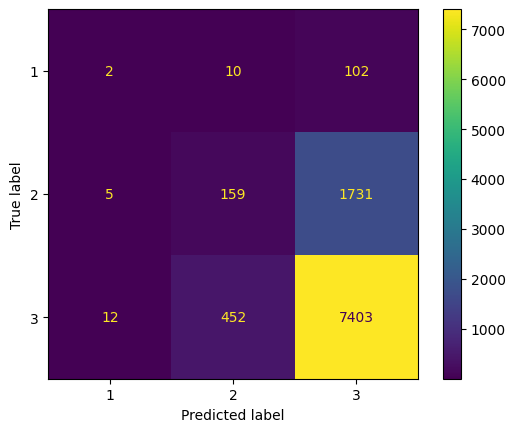

In [50]:
confusion_matrix_pretty = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_pretty, display_labels = [1, 2, 3])

cm_display.plot()

In [51]:
## Take a single tree instance of the 150 in the forest
estimator = rf.estimators_[5]

## Export the file as dot
export_graphviz(estimator, out_file='tree1.dot',
                feature_names = x_train_new.columns,
                class_names = ['Casualty Severity 1','Casualty Severity 2', 'Casualty Severity 3'],
                rounded = True, proportion = False,
                precision = 2, filled = True)



In [52]:
## Reimport file through different package
(graph,) = pydot.graph_from_dot_file('tree1.dot')
## Convert dot file to png
graph.write_png('tree1.png')
## Display the png
from IPython.display import Image
Image(filename='tree1.png')

print('')


In [53]:
## Downsample the data
sev_1 = merged_data[merged_data['casualty_severity'] == 1]
sev_2 = merged_data[merged_data['casualty_severity'] == 2]
sev_3 = merged_data[merged_data['casualty_severity'] == 3]

sev_2_down = resample(sev_2, replace = True, n_samples = sev_1.shape[0], random_state = 123)
sev_3_down = resample(sev_3, replace = True, n_samples = sev_1.shape[0], random_state = 123)

In [54]:
## Section for the Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [55]:
y_pred_gnb = gnb.predict(X_test)
metrics.accuracy_score(y_test, y_pred_gnb)

0.7375455650060754

In [56]:
confusion_matrix(y_test, y_pred_gnb)

array([[   3,   25,   86],
       [   8,  456, 1431],
       [  38, 1004, 6825]])

In [57]:
## Section for the Support Vector Classifier
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [58]:
y_pred_svc = svc.predict(X_test)
metrics.accuracy_score(y_test, y_pred_svc)

0.7964763061968408

In [59]:
confusion_matrix(y_test, y_pred_svc)

array([[   0,    0,  114],
       [   0,    3, 1892],
       [   0,    4, 7863]])

In [60]:
## Section for the K nearest neighbors classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
y_pred_knc = knc.predict(X_test)
metrics.accuracy_score(y_test, y_pred_knc)

0.7689347914135277

In [62]:
confusion_matrix(y_test, y_pred_knc)

array([[   0,   11,  103],
       [   7,  183, 1705],
       [   9,  447, 7411]])

In [63]:
## For the MLP Classifier, since it falls under the neural network category, we upsample the data to provide additional data
ros = RandomOverSampler(random_state = 123)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [64]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 3), random_state=123)
mlp.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 3), random_state=123,
              solver='lbfgs')

In [65]:
y_pred_mlp = mlp.predict(X_test)
metrics.accuracy_score(y_test, y_pred_mlp)

0.1918793033616849

In [66]:
confusion_matrix(y_test, y_pred_mlp)

array([[   0,  114,    0],
       [   0, 1895,    0],
       [   0, 7867,    0]])

In [67]:
# Group dataframe by region to get counts of casualty severity for each region
groupByRegion = merged_data.groupby(['Region', 'casualty_severity']).size().reset_index(name='Count')
pivot_table = groupByRegion.pivot_table(index='Region', columns='casualty_severity', values='Count', fill_value=0)

# Reset index for a cleaner DataFrame
pivot_table.reset_index(inplace=True)

# Display the resulting DataFrame
print(pivot_table)

casualty_severity        Region  1   2    3
0                          Adur  2  21   74
1                     Allerdale  0  20   51
2                  Amber Valley  5  28  110
3                          Arun  2  38  145
4                      Ashfield  3  27   68
..                          ... ..  ..  ...
326                     Wrexham  1   2   12
327                    Wychavon  4  22   54
328                        Wyre  2  26   92
329                 Wyre Forest  4  16   66
330                        York  1  18  114

[331 rows x 4 columns]


In [68]:
import geopandas as gpd
uk_regions = gpd.read_file('/content/drive/MyDrive/IST 718 Big Data/LSOA_GeoJSON.geojson')

print(uk_regions.head())
print(len(uk_regions))


   FID   LSOA01CD                    LSOA01NM  \
0    1  E01000001         City of London 001A   
1    2  E01025840  Hinckley and Bosworth 006B   
2    3  E01018945         North Cornwall 010D   
3    4  W01001763                Cardiff 047D   
4    5  E01022141             Cheltenham 008E   

                               GlobalID                   geometry  
0  e9d16a60-851b-4ba4-b21d-f7ea11bc70aa  POINT (-0.09626 51.51966)  
1  ebdc87c8-d9f2-4b2e-8b0b-f573db07698b  POINT (-1.32776 52.57235)  
2  694b1162-b213-42f1-a54d-98b98245da96  POINT (-4.77999 50.45926)  
3  8925a28b-5fe5-49a8-a273-dc40779bf47a  POINT (-3.18174 51.45707)  
4  f01c4fcf-7651-467b-a72e-bece30fb7280  POINT (-2.06915 51.90568)  
34378


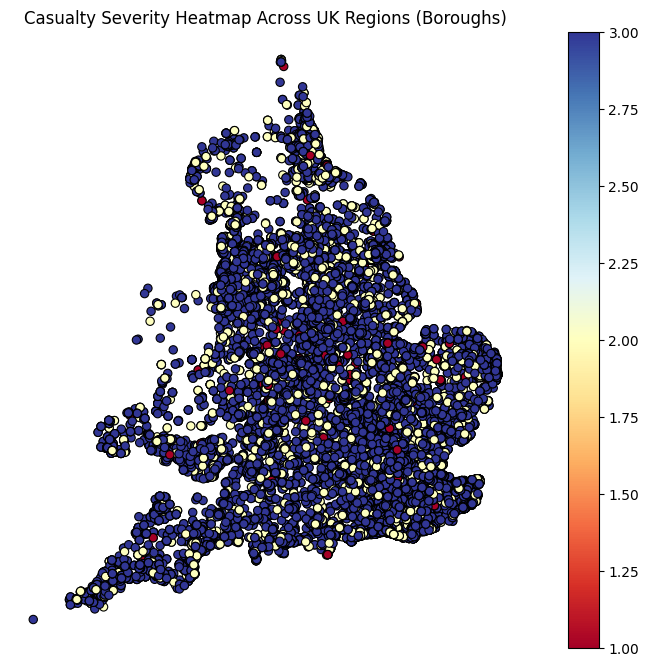

In [69]:
geodata = uk_regions.merge(merged_data, left_on='LSOA01CD', right_on='LSOA', how='left')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
geodata.plot(column='casualty_severity', cmap='RdYlBu', linewidth=0.8, ax=ax, edgecolor='k', legend=True)

# Set plot title and labels
ax.set_title('Casualty Severity Heatmap Across UK Regions (Boroughs)')
ax.set_axis_off()  # Turn off the axis

# Display the map
plt.show()

In [70]:
print(geodata.dtypes)

FID                                      int64
LSOA01CD                                object
LSOA01NM                                object
GlobalID                                object
geometry                              geometry
vehicle_reference                      float64
casualty_reference                     float64
casualty_class                         float64
sex_of_casualty                        float64
age_of_casualty                        float64
casualty_severity                      float64
pedestrian_location                    float64
pedestrian_movement                    float64
car_passenger                          float64
pedestrian_road_maintenance_worker     float64
casualty_type                          float64
casualty_home_area_type                float64
casualty_imd_decile                    float64
LSOA                                    object
Region                                  object
dtype: object
